In [2]:
import numpy as np
from tqdm import trange,tqdm
import matplotlib.pyplot as plt

In [70]:
def compute_figure3_empirical(n,d):
    values = []
    for _ in range(20):
        x1 = np.random.uniform(size=(1,d))
        x2 = np.random.uniform(size=(n,d))
        values.append(np.log(np.min(np.max(np.abs(x1-x2),axis=1),axis=0)))
    return [np.mean(values),np.std(values)/20]

def lower_bound(n,d):
    return np.log(d/(2*(d+1))) - np.log(n)/d

In [122]:
v1,v2,lb1,lb2 = [],[],[],[]
for d in np.concatenate([np.array([2,6],dtype=np.int32),np.linspace(10,100,10,dtype=np.int32)],dtype=np.int32):
    n1 = d*2
    n2 = d*d
    v1.append(compute_figure3_empirical(n1,d))
    v2.append(compute_figure3_empirical(n2,d))
for d in np.linspace(2,100,99):
    n1 = d*2
    n2 = d*d
    lb1.append(lower_bound(n1,d))
    lb2.append(lower_bound(n2,d))
v1,v2,lb1,lb2 = np.array(v1),np.array(v2),np.array(lb1),np.array(lb2)

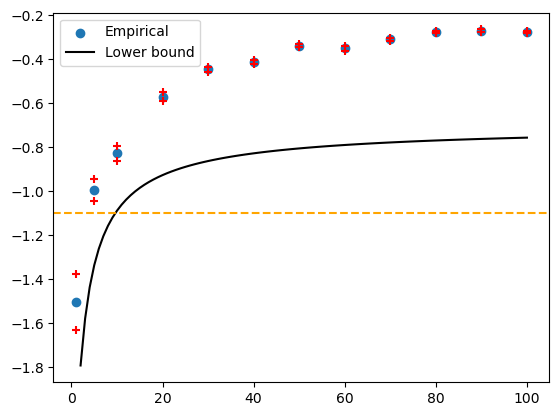

In [123]:
fig, ax1 = plt.subplots()
ax1.scatter(x=np.concatenate([np.array([1,5],dtype=np.int32),np.linspace(10,100,10,dtype=np.int32)],dtype=np.int32),y=v1[:,0],label='Empirical')
ax1.scatter(x=np.concatenate([np.array([1,5],dtype=np.int32),np.linspace(10,100,10,dtype=np.int32)],dtype=np.int32),y=v1[:,0]+3*v1[:,1],marker='+',color='red')
ax1.scatter(x=np.concatenate([np.array([1,5],dtype=np.int32),np.linspace(10,100,10,dtype=np.int32)],dtype=np.int32),y=v1[:,0]-3*v1[:,1],marker='+',color='red')

ax1.plot(np.linspace(2,100,99),lb1,label='Lower bound',color='black')
ax1.legend()

ax1.set_xticks(np.linspace(0,100,6))
ax1.set_yticks(np.linspace(-1.8,-0.2,9))
ax1.axhline(np.log(1/3),linestyle='dashed',color='orange')

plt.show()

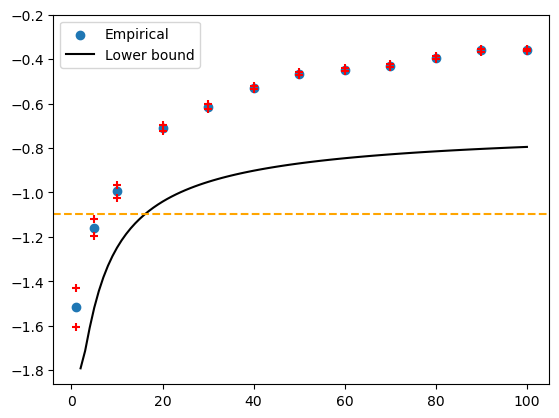

In [121]:
fig, ax2 = plt.subplots()
ax2.scatter(x=np.concatenate([np.array([1,5],dtype=np.int32),np.linspace(10,100,10,dtype=np.int32)],dtype=np.int32),y=v2[:,0],label='Empirical')
ax2.scatter(x=np.concatenate([np.array([1,5],dtype=np.int32),np.linspace(10,100,10,dtype=np.int32)],dtype=np.int32),y=v2[:,0]+3*v2[:,1],marker='+',color='red')
ax2.scatter(x=np.concatenate([np.array([1,5],dtype=np.int32),np.linspace(10,100,10,dtype=np.int32)],dtype=np.int32),y=v2[:,0]-3*v2[:,1],marker='+',color='red')

ax2.plot(np.linspace(2,100,99),lb2,label='Lower bound',color='black')
ax2.legend()

ax2.set_xticks(np.linspace(0,100,6))
ax2.set_yticks(np.linspace(-1.8,-0.2,9))
ax2.axhline(np.log(1/3),linestyle='dashed',color='orange')

plt.show()